# MA5790 - Assignment 7 - MM15B022 - R Mythreyi

In [1]:
%load_ext tikzmagic

The tikzmagic module is not an IPython extension.


In [1]:
%matplotlib inline

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Question 1

Part of proof of the Euler-Maclaurin formula

### Solution

Required to prove:
$$
\int_{a}^{b} \frac{B_{2 m+2}(\{t\})}{(2 m+2) !} g^{(2)}(t) d t=\int_{a}^{b} \frac{B_{2 m}(\{t\})}{(2 m) !} g(t) d t+\frac{b_{2 m+2}}{(2 m+2) !}\left(g^{\prime}(b)-g^{\prime}(a)\right)
$$

We can split the integral going from $a$ to $b$ into different parts, each of length 1 unit because if then, we can write $\{t\} = t-n$ where $n$ is the lower integer in the bound. Therefore,

$$
\int_{a}^{b} \frac{B_{2 m+2}(\{t\})}{(2 m+2) !} g^{(2)}(t) d t = \sum_{n=a}^{b} \int_{n}^{n+1} \frac{B_{2 m+2}(t-n)}{(2 m+2) !} g^{(2)}(t) d t
$$

Applying integration by parts on each term of RHS:
$$
\int_{n}^{n+1} \frac{B_{2 m+2}(t-n)}{(2 m+2) !} g^{(2)}(t) d t=  \frac{B_{2 m+2}(t-n)}{(2 m+2) !} \int g^{(2)}(t) d t \bigg\rvert_{n}^{n+1} - \int_{n}^{n+1} \frac{B'_{2 m+2}(t-n)}{(2 m+2) !} \int g^{(2)}(t) d t dt \\
$$ 
$$
= \frac{B_{2 m+2}(t-n)}{(2 m+2) !} g'(t) \bigg\rvert_{n}^{n+1} - \int_{n}^{n+1} \frac{B'_{2 m+2}(t-n)}{(2 m+2) !} g'(t) dt \\
= \frac{B_{2 m+2}(1) g^{\prime}(n+1)-B_{2 m+2}(0) g^{\prime}(n)}{(2 m+2) !} - \int_{n}^{n+1} \frac{B'_{2 m+2}(t-n)}{(2 m+2) !} g'(t) dt
$$


Using $B_{2 m+2}(1)=B_{2 m+2}(0)=b_{2 m+2}$ and $B'_n(x) = n B_{n-1}(x)$ for Bernoulli polynomials, we can get:

$$
\int_{n}^{n+1} \frac{B_{2 m+2}(t-n)}{(2 m+2) !} g^{(2)}(t) d t = \frac{b_{2 m+2}}{(2 m+2) !} \left(g^{\prime}(n+1)-g^{\prime}(n)\right) - \int_{n}^{n+1} \frac{B_{2 m+1}(t-n)}{(2 m+1) !} g'(t) d t
$$


Applying similar integration by parts to the 2nd term on RHS, we get:
$$
\int_{n}^{n+1} \frac{B_{2 m+1}(t-n)}{(2 m+1) !} g'(t) d t = \frac{B_{2 m+1}(1) g(n+1)-B_{2 m+1}(0) g(n)}{(2 m+1) !} - \int_{n}^{n+1} \frac{B'_{2 m+1}(t-n)}{(2 m+1) !} g(t) dt \\
$$
which can be simplified using $B'_n(x) = n B_{n-1}(x)$ and $B_{2k+1}=0\; \forall k>0$:

$$
\int_{n}^{n+1} \frac{B_{2 m+1}(t-n)}{(2 m+1) !} g'(t) d t = - \int_{n}^{n+1} \frac{B_{2 m}(t-n)}{(2 m) !} g(t) d t
$$

The summation becomes:
$$
\sum_{n=a}^{b} \int_{n}^{n+1} \frac{B_{2 m+2}(t-n)}{(2 m+2) !} g^{(2)}(t) d t =  \sum_{n=a}^{b} \left( \frac{b_{2 m+2}}{(2 m+2) !} \left(g^{\prime}(n+1)-g^{\prime}(n)\right) + \int_{n}^{n+1} \frac{B_{2 m}(t-n)}{(2 m) !} g(t) d t \right) \\
$$

Terms cancel out in the expansion, and we may replace $(t-n)$ with $\{t\}$ and switch integrals to $[a,b]$. The result is:
$$
\int_{a}^{b} \frac{B_{2 m+2}(\{t\})}{(2 m+2) !} g^{(2)}(t) d t=\int_{a}^{b} \frac{B_{2 m}(\{t\})}{(2 m) !} g(t) d t+\frac{b_{2 m+2}}{(2 m+2) !}\left(g^{\prime}(b)-g^{\prime}(a)\right)
$$

Hence proved.

## Question 2

Getting $C$ in Stirling's Approximation
$$ n ! \sim C \sqrt{n}\left(\frac{n}{e}\right)^{n} $$

### Solution

- We start with obtaining the recursive formula for $I_n$

We can split the function $ \sin ^{n}(x) = \sin ^{n-1}(x) \sin (x)$ and apply integration by parts:
$$
I_{n}=\int_{0}^{\pi / 2} \sin ^{n}(x) d x = \left[ -\sin ^{n-1}(x) \cos (x)\right] \bigg\rvert_0^{\pi/2} + (n-1) \int_{0}^{\pi / 2}\sin ^{n-2}(x) \cos^2 (x) d x
$$ 

Sin goes to zero at both the limits, hence the first term is 0. The second term can be split into two using $\cos^2(x) = 1-\sin^2(x)$:
$$
I_{n} = (n-1) \int_{0}^{\pi / 2} \sin ^{n-2}(x) d x-(n-1) \int_{0}^{\pi / 2} \sin ^{n}(x) d x \\
I_{n} = (n-1) I_{n-2} - (n-1) I_{n} \\
I_{n}=\frac{n-1}{n} I_{n-2}
$$

Case 1: $n$ is even $2k$. Base case $I_0 = \pi/2$ and we can divide both numerator and denominator by all even terms to get identifiable forms. 

$$
I_{2k} = \frac{2k \cdot (2k-1) \cdot (2k-2) \cdot (2k-3) \cdots 2 \cdot 1}{\left(2^{n}\right)^{2}\cdot k^{2}\cdot(k-1)^{2}\cdot (k-2)^2 \cdots 2^2 \cdot 1^{2}} \frac{\pi}{2} \\
I_{2k} = \frac{\pi}{2^{2 k+1}} \left( \begin{array}{c}{2 k} \\ {k}\end{array}\right)
$$

Case 2: $n$ is odd $2k+1$. Base case $I_1 = 1$
$$
I_{2k+1} = \frac{(2 k)^{2}\cdot(2 k-2)^{2} \cdots 2^{2}}{(2 k+1)\cdot(2 k)\cdot(2 k-1) \cdots 3\cdot2 \cdot1} = \frac{2^{2k}}{2k+1} \frac{k! k!}{2k!} \\
I_{2k+1} = \frac{2^{2 k}}{2 k+1} \frac{1}{\left( \begin{array}{c}{2 k} \\ {k}\end{array}\right)}
$$

Therefore, 
$$
I_{n}=\int_{0}^{\pi / 2} \sin ^{n}(x) d x=\left\{\begin{array}{ll}{\frac{\pi}{2^{2 k+1}} \left( \begin{array}{c}{2 k} \\ {k}\end{array}\right)} & {\text { if } n=2 k+1} \\ {\frac{2^{2 k}}{2 k+1} \frac{1}{(2 k)}} & {\text { if } n=2 k+1}\end{array}\right.
$$

- From the recursive relation for $I_n$, substituting $n = 2k+1$ :

$$
I_{2k+1} = \frac{2k}{2k+1} I_{2k-1}
$$

Therefore, the limit:
$$
\lim _{k \rightarrow \infty} \frac{I_{2 k-1}}{I_{2 k+1}}= \lim _{k \rightarrow \infty} \frac{2k+1}{2k} = 1
$$

- The sin function never exceeds a magnitude of 1 in the given range.
$$
0 \leq \sin(x) \leq 1
$$

Everytime we raise the power of a positive number less than 1, its value decreases because we are multiplying it with a number less than 1. Therefore, since $n$ is positive,

$$
\sin^{2n+1} < \sin^{2n} < \sin^{2n-1}
$$

at all points. Therefore, the area covered under these curves will be in the same order. Area under the curve is also the integral in this case. Hence:

$$
I_{2n+1} < I_{2n} < I_{2n-1}
$$

- From the limit proved above, and using the inequality proved previously, we get:

$$
\frac{I_{2n+1}}{I_{2n+1}} < \frac{I_{2n}}{I_{2n+1}} < \frac{I_{2n-1}}{I_{2n+1}}
$$

Taking limits:
$$
\lim _{n \rightarrow \infty} \frac{I_{2n+1}}{I_{2n+1}} < \lim _{n \rightarrow \infty} \frac{I_{2n}}{I_{2n+1}} < \lim _{n \rightarrow \infty} \frac{I_{2n-1}}{I_{2n+1}} \\
1 < \lim _{n \rightarrow \infty} \frac{I_{2n}}{I_{2n+1}} < 1
$$

Using Sandwich theorem,
$$
\lim _{n \rightarrow \infty} \frac{I_{2n}}{I_{2n+1}} = 1
$$

- Substituting the values from the first result in the limit, we get:

$$
\lim _{n \rightarrow \infty} \frac{I_{2n}}{I_{2n+1}} = \lim _{n \rightarrow \infty} \frac{{\frac{2^{2 n}}{2 n+1} \frac{1}{\left( \begin{array}{c}{2 n} \\ {n}\end{array}\right)}}}{\frac{\pi}{2^{2 n+1}} \left( \begin{array}{c}{2 n} \\ {n}\end{array}\right)} = \lim _{n \rightarrow \infty} \left( \begin{array}{c}{2 n} \\ {n}\end{array}\right)^2 \left(\frac{\pi n}{4^{2 n}}\right) = 1 \text{. Since }\lim _{n \rightarrow \infty} \left[\frac{\left(2+\frac{1}{n}\right)}{2}\right] = 1$$

Therefore,

$$
\left( \begin{array}{c}{2 n} \\ {n}\end{array}\right) \sim \frac{4^{n}}{\sqrt{n \pi}}
$$

- We can use stirling's approximation to expand the factorials in $\left( \begin{array}{c}{2 n} \\ {n}\end{array}\right) $
$$
\left( \begin{array}{c}{2 n} \\ {n}\end{array}\right) = \frac{C \sqrt{2 n}\left(\frac{2 n}{e}\right)^{2 n}}{C \sqrt{n}\left(\frac{n}{e}\right)^{n} \cdot C \sqrt{n}\left(\frac{n}{e}\right)^{n}}
$$

Substituting in the following limit, we get:
$$
\lim _{n \rightarrow \infty}\left[\frac{\sqrt{\pi n}}{4^{n}} \left( \begin{array}{c}{2 n} \\ {n}\end{array}\right)\right]=1 \\
\lim _{n \rightarrow \infty}\left[\frac{\sqrt{2 \pi}}{C}\right]=1
$$

Therefore, 
$$
C=\sqrt{2 \pi}
$$

## Question 3

Numerical Integration

### Solution

In [4]:
import numpy as np

def fun0(x):
    return np.exp(x**2)
def fun1(x):
    return 2*x*np.exp(x**2)
def fun3(x):
    return (8*x*x*x+12*x)*np.exp(x*x)

all_N =2**np.arange(1,11)
inte_trap=np.zeros(len(all_N))
inte_midp=np.zeros(len(all_N))
inte_trap1=np.zeros(len(all_N))
inte_trap3=np.zeros(len(all_N))

for i in range(0,np.size(all_N)):
    curr_N = all_N[i];
    h =1/curr_N
    x = np.linspace(0,1,curr_N+1)
    y = 0.5*(x[0:-2]+x[1:-1]);
    
    inte_trap[i] = h*(np.sum(fun0(x))-(fun0(x[0])+fun0(x[-1]))/2);
    inte_midp[i] = h*np.sum(fun0(y));
    inte_trap1[i] = inte_trap[i] + h*h/12*(fun1(0)-fun1(1));
    inte_trap3[i] = inte_trap[i] + h*h/12*(fun1(0)-fun1(1))-(h**4/720)*(fun3(0)-fun3(1));

exact_inte=1.46265174590718161

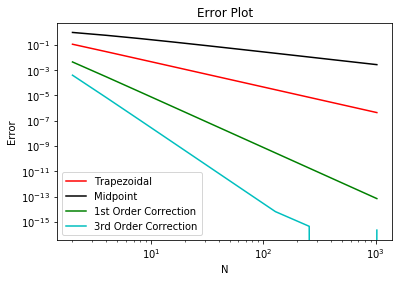

In [5]:
import matplotlib.pyplot as plt
plt.loglog(all_N,np.abs(inte_trap-exact_inte),'r',label='Trapezoidal');
plt.loglog(all_N,np.abs(inte_midp-exact_inte),'k',label='Midpoint')
plt.loglog(all_N,np.abs(inte_trap1-exact_inte),'g',label='1st Order Correction')
plt.loglog(all_N,np.abs(inte_trap3-exact_inte),'c',label='3rd Order Correction')
plt.title("Error Plot")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.show()

In [6]:
import numpy as np
from scipy.special.orthogonal import p_roots

nnodes=np.arange(2,52)
inte_gaus=np.zeros(len(nnodes))

def fun0(x):
    return np.exp(x**2)

def quad_gauss(a,b,degree):
    [nodes,weights] = p_roots(degree+1)
    inte=0.5*(b-a)*sum(weights*fun0(0.5*(b-a)*nodes+0.5*(b+a)))
    return inte

for i in range(0,np.size(nnodes)):
    inte_gaus[i]=quad_gauss(0,1,nnodes[i])

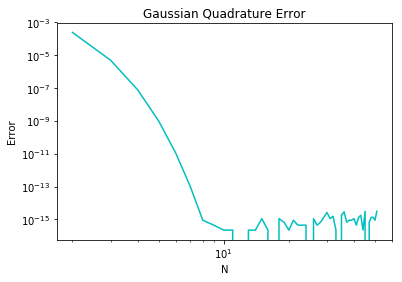

In [7]:
import matplotlib.pyplot as plt
plt.loglog(nnodes,np.abs(inte_gaus-exact_inte),'c')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Gaussian Quadrature Error')
plt.show()

In [9]:
errors_4 = np.zeros((4,len(all_N)))
errors_g = np.zeros((1,len(nnodes)))

errors_4[0,:] = np.abs(inte_trap-exact_inte);
errors_4[1,:] = np.abs(inte_midp-exact_inte);
errors_4[2,:] = np.abs(inte_trap1-exact_inte);
errors_4[3,:] = np.abs(inte_trap3-exact_inte);

errors_g = np.abs(inte_gaus-exact_inte);
n_value = np.zeros(5)
for i in range(4):
    for j in range(len(errors_4[0])):
        if errors_4[i,j] < 10**(-12):
            n_value[i] = all_N[j];
            break
    else:
        n_value[i] = all_N[-1]

for j in range(len(errors_g)):
    if errors_g[j] < 10**(-12):
            n_value[4] = nnodes[j];
            break

print(n_value)

[1024. 1024. 1024.   64.    7.]


In order above are the $N$ values from the calculations. But, we haven't extended the length of N sufficiently. Because of the order of convergence, Trapezoidal and Mid-Point need around a million points ($10^6$). 1st order correction makes it converge at $10^3$ roughly. 3rd order makes it converge at around 60 points. Gaussian quadrature has spectral accurace and converges in 7 points.

## Question 4

Numerical Integration

### Solution

After subtituting $x=t^2$, the function $\frac{e^{-x}}{\sqrt{x}}$ becomes $2 e^{-t^{2}}$.
The limits also change from $0$ to $2$ to $0$ to $\sqrt{2}$.

In [4]:
import numpy as np
from scipy.special import erf

def fun(x):
    return np.exp(-x)/np.sqrt(x)

def trans_fun(x):
    return 2*np.exp(-x**2)

all_N=2**np.arange(1,11)

inte1 =np.zeros(np.size(all_N))
inte2=np.zeros(np.size(all_N))

for i in range(0,np.size(all_N)):
    curr_N = all_N[i];

    h1  =2/curr_N;
    x1  =np.linspace(0,2,curr_N+1)
    y1  =0.5*(x1[0:-1]+x1[1:]);
    inte1[i]=h1*np.sum(fun(y1))

    h2 =np.sqrt(2)/curr_N
    x2=np.linspace(0,np.sqrt(2),curr_N+1)
    y2=0.5*(x2[0:-1]+x2[1:]);
    inte2[i]=h2*np.sum(trans_fun(y2))

exact_inte=np.sqrt(np.pi)*erf(np.sqrt(2))

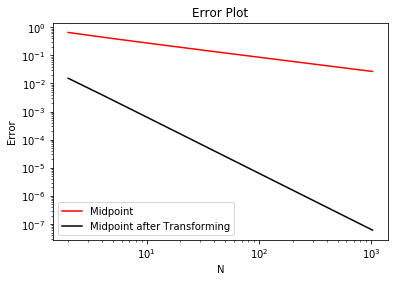

In [5]:
import matplotlib.pyplot as plt
plt.loglog(all_N,np.abs(inte1-exact_inte),'r',label='Midpoint')
plt.loglog(all_N,np.abs(inte2-exact_inte),'k',label='Midpoint after Transforming')
plt.title("Error Plot")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.show()

The transformed function converges faster. 

## Question 5

Error in Hermite Interpolation

### Solution

Let the function $f(x)$ (which is differentiable $2n+2$ times in $(a,b)$ and $x_0 < x_1 < x_2 < \cdots < x_n$ be $n+1$ points using which we get the Hermite interpolant of $f(x)$, denoted by $p_{2n+1}(x)$. From the property of Hermite interpolation, $$ f^{(k)}\left(x_{i}\right)=p_{2n+1}^{(k)}\left(x_{i}\right) \;\; \forall i=0,1,\cdots,n \; \text{and } k=0,1$$

Consider:
$$
W(x)=\prod_{i=0}^{n}\left(x-x_{i}\right)^{2}
$$
and the function:
$$
g(t)=f(t)-p_{2 m+1}(t)-\frac{f(x)-p_{2 m+1}(x)}{W(x)} W(t)
$$

- $g(x_i) = 0 \implies n+1$ roots 
- $g(x) = 0$ since $f(x)-p_{2n+1}(x)$ cancel out

Hence, $g(x)$ has $n+2$ roots in $(a,b)$. From Rolle's Theorem, $g'(x)$ has at least $n+1$ roots, one each in the interval between two adjacent roots of $g(x)$. Hence, none of these roots are $x_i$ or $x$.

From the property of Hermite interpolation, $f'(x_i) = p'_{2m+1}(x_i)$ and $W'(x_i)=0$. Hence, there are $m+1$ additional roots of $g'(t)$, making it $2n+2$ roots in total in $[a,b]$.

From Rolle's Theoren, $g''(t)$ has $2n+1$ roots, $g'''(t)$ has $2n$ roots $\cdots$ $g^{(2n+2)}(t)$ has 1 root. Let this root be $\xi$.

$$
g^{(2 n+2)}(\xi) = f^{(2 n+2)}(\xi)-\frac{f(x)-p_{2 n+1}(x)}{W(x)}(2 n+2) ! = 0
$$

Rearranging, we get:
$$
f(x)-p_{2 n+1}(x)=\frac{f^{(2 n+2)}(\xi(x))}{(2 n+2) !} W(x)
$$

i.e:
$$
f(x)-p_{2 n+1}(x)=\frac{f^{2 n+2}\left(\xi_{x}\right)}{(2 n+2) !} \prod_{j=0}^{n}\left(x-x_{j}\right)^{2}
$$

Hence proved.

## Question 6

Error in Gaussian Quadrature

### Solution

Let's consider a function interpolated using Hermite Interpolation using $n$ points, which are the roots of the monic Legendre polynomial of degree $n$, denoted by $q_n$. The polynomial interpolant will have the following properties for $i = \{0,1,2,\cdots,n-1\}$:
$$
f'\left(x_{j}\right)=p_{2n-1}'\left(x_{j}\right) \\
f\left(x_{j}\right)=p_{2n-1}\left(x_{j}\right)
$$

We proved in Question 5 that the error in Hermite interpolation:
$$
f(x)-p_{2 n-1}(x)=\frac{f^{2 n}\left(\xi\right)}{(2 n) !} \prod_{j=0}^{n-1}\left(x-x_{j}\right)^{2}
$$

However, from the definition of Legendre polynomials, and the fact that $x_j$ are the roots of the Legendre Polynomial of degree $n$, we can rewrite:
$$
\prod_{j=0}^{n-1}\left(x-x_{j}\right) = q_n(x)
$$

Hence,
$$
f(x)-p_{2 n-1}(x)=\frac{f^{2 n}\left(\xi_x\right)}{(2 n) !} q_n^2(x) 
$$

Integrating both sides from $-1$ to $1$ and understanding that from applying Gaussian Quadrature:
$$
\int_{-1}^1p_{2 n-1}(x) dx = \sum_{i=0}^{n} w_{i} f\left(x_{i}\right)
$$

we get:
$$
\int_{-1}^1 f(x) dx - \sum_{i=0}^{n} w_{i} f\left(x_{i}\right) = \int_{-1}^1 \frac{f^{2 n}\left(\xi_x\right)}{(2 n) !} q_n^2 dx
$$

From Mean Value Theorem for integrals, we get:
$$
\int_{-1}^{1} f(x) d x-\sum_{i=0}^{n} w_{i} f\left(x_{i}\right)=\frac{f^{(2 n)}(\xi)}{(2 n) !} \int_{-1}^{1} q_{n}^{2}(x) d x
$$
for some $\xi$ in $(-1,1)$. 

Hence proved.